In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Функція гіпотези лінійної регресії у векторному вигляді:
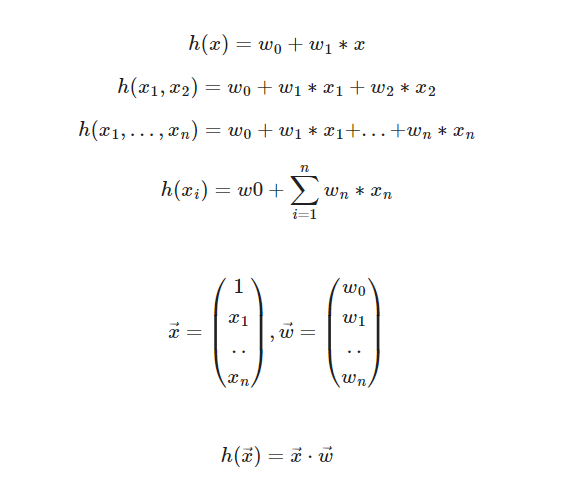


In [ ]:
# Функція гіпотези лінійної регресії в коді
def h(w_0, w_1, df):
  return w_0+w_1*df

2. Функція для обчислення функції втрат у векторному вигляді:

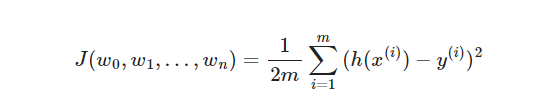

In [ ]:
# Функція для обчислення функції втрат в коді
def loss_function(w_0, w_1, df):
  m = df.shape[0]
  cost = 0
  for x, y in zip(df['area'], df['price']):
    cost += (h(w_0, w_1, x) - y)**2
  return cost/(2*m)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
import numpy as np
import pandas as pd

# Припустимо, що це ваш стовпчик
column = pd.Series([7200, 3816, 2610, 3750, 6000, 5450, 4500, 4040, 5500])

# Перетворення стовпчика у вектор numpy
vector = column.values

print(vector)


[7200 3816 2610 3750 6000 5450 4500 4040 5500]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Підготовка матриці вхідних ознак X та вектора цільової змінної x i y

X_sample = np.array(df[['area', 'bathrooms', 'bedrooms']])  # Видаляємо цільову змінну, якщо вона

Y_sample = np.array(df[['price']])

# нормування вибірок x i y
x_scaler = MinMaxScaler()
y_scaler =MinMaxScaler()
x_scaler=x_scaler.fit_transform(X_sample)

y_scaler=y_scaler.fit_transform(Y_sample)

print (x_scaler)
print (y_scaler[:5])

[[0.39656357 0.33333333 0.6       ]
 [0.5024055  1.         0.6       ]
 [0.57113402 0.33333333 0.4       ]
 ...
 [0.13539519 0.         0.2       ]
 [0.08659794 0.         0.4       ]
 [0.15120275 0.         0.4       ]]
[[1.        ]
 [0.90909091]
 [0.90909091]
 [0.90606061]
 [0.83636364]]


In [ ]:
# Розділення на тренувальну та тестову вибірки
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y_scaler, test_size=0.2, random_state=42)


# Друк тренувальної та тестової вибірок
print("Тренувальна вибірка X:", x_train,'\n', x_train.shape, '\n')
print("Тестова вибірка X:", x_test [:5], '\n', x_test.shape, '\n')
print("Тренувальна вибірка y:", y_train [:5], '\n',  y_train.shape, '\n')
print("Тестова вибірка y:", y_test [:5], '\n', y_test.shape)

Тренувальна вибірка X: [[0.29896907 0.33333333 0.4       ]
 [0.3814433  0.33333333 0.4       ]
 [0.14886598 0.         0.2       ]
 ...
 [0.19587629 0.33333333 0.4       ]
 [0.16426117 0.         0.2       ]
 [0.26460481 0.33333333 0.4       ]] 
 (436, 3) 

Тестова вибірка X: [[0.29209622 0.33333333 0.6       ]
 [0.33333333 0.33333333 0.4       ]
 [0.16426117 0.         0.2       ]
 [0.23024055 0.         0.4       ]
 [0.15876289 0.         0.4       ]] 
 (109, 3) 

Тренувальна вибірка y: [[0.5       ]
 [0.39393939]
 [0.18787879]
 [0.14545455]
 [0.10909091]] 
 (436, 1) 

Тестова вибірка y: [[0.2       ]
 [0.42424242]
 [0.16969697]
 [0.40606061]
 [0.09090909]] 
 (109, 1)


In [ ]:
# один крок градієнтного спуску
def gradient_descent(X, Y, max_itertions=1000, learning_rate= 0.01, stopping_threshold = 0.00000001):
  slope = 0.45
  intercept = 0.05
  n = len(Y)

  previous_cost = None

  for i in range(max_itertions):
    y_pred = slope*X + intercept
    cost = np.sum( (Y-y_pred)**2) / ( 2*len(Y) )

    if previous_cost and abs(previous_cost-cost) <= stopping_threshold:
      break

    previous_cost = cost

    slope_derivative = -(2/n) * sum(X * (Y-y_pred))
    intercept_derivative = -(2/n) * sum(Y-y_pred)

    slope = slope - (learning_rate * slope_derivative)
    intercept = intercept - (learning_rate * intercept_derivative)

    # print(f"Iteration {i+1}: Cost {cost}, Weights: slope={slope}, intercept={intercept}")
  return slope, intercept


X = np.array(x_train)
Y= np.array(y_train)
slope, intercept = gradient_descent(X, Y)
print(f"Оптимальні параметри роботи моделі: slope={slope}, intercept={intercept}")


Оптимальні параметри роботи моделі: slope=[0.49507033 0.48247943 0.43375974], intercept=[0.13696574 0.21324893 0.08562405]


In [ ]:
def h(intercept, slope, df):
  return intercept+slope*df
area_X = ( X [:,0] * 0.50 + 0.13)
bathrooms_X =( X [:,1] * 0.48 + 0.21)
bedrooms_X =( X [:,2] * 0.43 + 0.08)
print(area_X.reshape(-1,1)[:5],'\n',
bedrooms_X.reshape(-1,1)[:5],'\n',
bathrooms_X.reshape(-1,1)[:5])

[[0.27948454]
 [0.32072165]
 [0.20443299]
 [0.16298969]
 [0.20216495]] 
 [[0.252]
 [0.252]
 [0.166]
 [0.252]
 [0.252]] 
 [[0.37]
 [0.37]
 [0.21]
 [0.21]
 [0.21]]


In [ ]:
Y [:5]

array([[0.5       ],
       [0.39393939],
       [0.18787879],
       [0.14545455],
       [0.10909091]])

Знайдіть найкращі параметри
𝑤
⃗
w
  для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

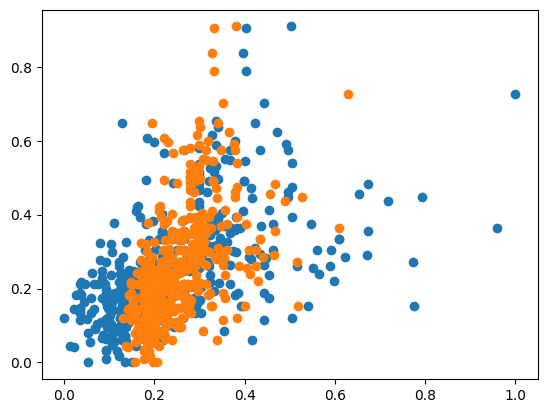

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X [:,0], Y)
plt.scatter(area_X, Y)
plt.show()

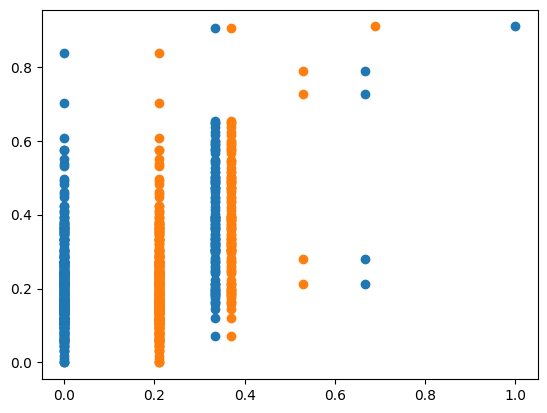

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X [:,1], Y)
plt.scatter(bathrooms_X, Y)
plt.show()

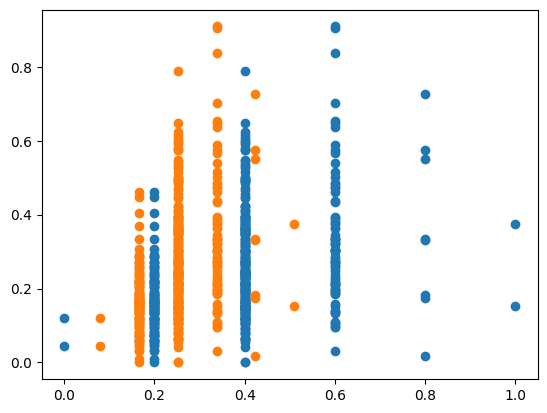

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X [:,2], Y)
plt.scatter(bedrooms_X, Y)
plt.show()

In [ ]:
# знайдіть ці ж параметри за допомогою аналітичного рішення.
import numpy as np

def linear_regression(X, Y):
    # Додамо стовпець з одиницями для врахування зсуву (bias term)
    X_an = np.c_[np.ones((len(X), 1)), X]

    # Обчислюємо оптимальні параметри за допомогою аналітичного методу найменших квадратів
    opt_par = np.linalg.inv(X_an.T@(X_an))@(X_an.T)@(Y)

    return opt_par

# Отримуємо оптимальні параметри
opt_par = linear_regression(X, Y)
print("Оптимальні параметри моделі (theta_best):", opt_par)

Оптимальні параметри моделі (theta_best): [[0.05731797]
 [0.43519815]
 [0.36943368]
 [0.15592972]]


для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати.

In [305]:
#Перевіряю спрогнозовані значення ціни відносно площі
from sklearn import linear_model
sgd_r = linear_model.SGDRegressor(max_iter=1000, verbose=2)
sgd_r.fit(x_test[:,0].reshape(-1,1), y_test)
sgd_r.predict(x_test.reshape(-1,1)[:5])

-- Epoch 1
Norm: 0.03, NNZs: 1, Bias: 0.098924, T: 109, Avg. loss: 0.042934
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 1, Bias: 0.144809, T: 218, Avg. loss: 0.029546
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 1, Bias: 0.173747, T: 327, Avg. loss: 0.024174
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1, Bias: 0.193912, T: 436, Avg. loss: 0.021474
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1, Bias: 0.208670, T: 545, Avg. loss: 0.019958
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 1, Bias: 0.219549, T: 654, Avg. loss: 0.019066
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 1, Bias: 0.227860, T: 763, Avg. loss: 0.018512
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.09, NNZs: 1, Bias: 0.233879, T: 872, Avg. loss: 0.018164
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.09, NNZs: 1, Bias: 0.238609, T: 981, Avg. loss: 0.017935
Total training time: 0.00 seconds.
-

array([0.27033705, 0.27431536, 0.30004173, 0.27431536, 0.27431536])

In [306]:
#Перевіряю спрогнозовані значення ціни відносно кількості ванних кімнат
from sklearn import linear_model
sgd_r = linear_model.SGDRegressor(max_iter=1000, verbose=2)
sgd_r.fit(x_test[:,1].reshape(-1,1), y_test)
sgd_r.predict(x_test.reshape(-1,1)[:5])

-- Epoch 1
Norm: 0.02, NNZs: 1, Bias: 0.100202, T: 109, Avg. loss: 0.043507
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1, Bias: 0.147181, T: 218, Avg. loss: 0.030381
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 1, Bias: 0.177734, T: 327, Avg. loss: 0.024931
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 1, Bias: 0.199225, T: 436, Avg. loss: 0.022103
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 1, Bias: 0.215364, T: 545, Avg. loss: 0.020478
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 1, Bias: 0.227447, T: 654, Avg. loss: 0.019490
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 1, Bias: 0.236600, T: 763, Avg. loss: 0.018881
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 1, Bias: 0.243371, T: 872, Avg. loss: 0.018490
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 1, Bias: 0.248742, T: 981, Avg. loss: 0.018229
Total training time: 0.01 seconds.
-

array([0.27425188, 0.27728357, 0.29688847, 0.27728357, 0.27728357])

In [307]:
# #Перевіряю спрогнозовані значення ціни відносно кількості спальних кімнат
from sklearn import linear_model
sgd_r = linear_model.SGDRegressor(max_iter=1000, verbose=2)
sgd_r.fit(x_test[:,2].reshape(-1,1), y_test)
sgd_r.predict(x_test.reshape(-1,1)[:5])

-- Epoch 1
Norm: 0.04, NNZs: 1, Bias: 0.098079, T: 109, Avg. loss: 0.041713
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 1, Bias: 0.140774, T: 218, Avg. loss: 0.028315
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 1, Bias: 0.167074, T: 327, Avg. loss: 0.023345
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 1, Bias: 0.185780, T: 436, Avg. loss: 0.020937
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 1, Bias: 0.198034, T: 545, Avg. loss: 0.019681
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 1, Bias: 0.207727, T: 654, Avg. loss: 0.018981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.10, NNZs: 1, Bias: 0.214423, T: 763, Avg. loss: 0.018582
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.11, NNZs: 1, Bias: 0.219135, T: 872, Avg. loss: 0.018350
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.11, NNZs: 1, Bias: 0.222401, T: 981, Avg. loss: 0.018212
Total training time: 0.00 seconds.
-

array([0.25755872, 0.26213677, 0.29174144, 0.26213677, 0.26213677])

In [332]:
x_test= x_test [:,0].reshape(-1,1)
x_test [:5]

array([[0.29209622],
       [0.33333333],
       [0.16426117],
       [0.23024055],
       [0.15876289]])

In [330]:
y_test [:5]

array([[0.2       ],
       [0.42424242],
       [0.16969697],
       [0.40606061],
       [0.09090909]])

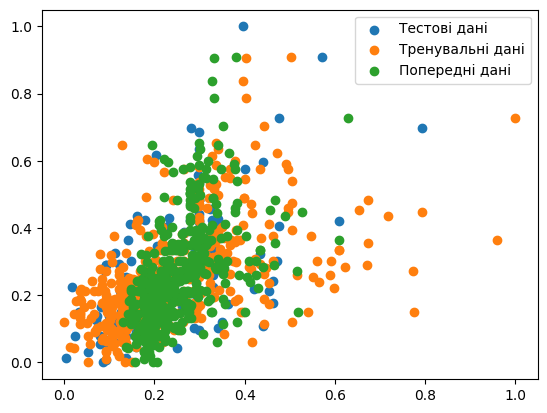

In [343]:
import matplotlib.pyplot as plt

# Відобразимо тестові дані та відповідні передбачення
plt.scatter(x_test[:,0], y_test, label='Тестові дані')
plt.scatter(X[:,0], Y, label='Тренувальні дані')
plt.scatter(area_X, Y, label='Попередні дані')

# Додамо легенду
plt.legend()

# Показати графік
plt.show()
